In [88]:
# #pip install
# %pip install scikit-learn
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib
# %pip install imblearn

In [89]:
#imports
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [90]:
#treinamentos
def knnFit(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=100)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia KNN:", acuracia,'%')
    return model
def gaussian(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    model = gnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia gaussian:", acuracia,'%')
    return model
def bernoullin(X_train, y_train, X_test, y_test):
    bnb = BernoulliNB()
    model = bnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia Bernoulli:", acuracia,'%')
    return model

In [91]:
#utils
import warnings
warnings.filterwarnings("ignore")
def shuffle(X, y):
    return train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)

def eliminacaoSequencial(X_train, y_train, X_test, y_test):
    # Converte indices para um array booleano compatível com numpy
    indices = np.ones(len(X_train), dtype=bool)
    
    for i in range(len(X_train)):
        # Temporariamente desativa o índice `i`
        indices[i] = False
        
        # Treina o modelo sem o ponto `i`
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(X_train[indices], y_train[indices])
        
        # Verifica se o ponto removido ainda é classificado corretamente
        pred = model.predict([X_train.iloc[i].values])
        if pred != y_train.iloc[i]:
            # Mantém o ponto se não for corretamente classificado
            indices[i] = True

    print("Quantas amostras de treino sobraram:", np.sum(indices))

    # Re-treina o modelo com o conjunto de dados reduzido
    model = KNeighborsClassifier(n_neighbors=100)
    model.fit(X_train[indices], y_train[indices])

    # Faz a predição e avalia o desempenho
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("Acurácia final:", accuracy)

def insercaoSequencial(X_train, y_train, X_test, y_test):
    indices = []
    for _ in range(len(X_train)):
        indices.append(False)

    # inclui a primeira amostra ja que o modelo nunca vai acertar
    indices[0] = True

    # faz a logica de tentar inserir cada registro e ver se está correto
    for i in range(1,len(X_train)):
        model = KNeighborsClassifier(n_neighbors = 100)
        model.fit(X_train[indices], y_train[indices])

    pred = model.predict([X_train.values[i]])
    if pred != y_train.values[i]:
        indices[i] = True

    print("Quantas amostras de treino sobraram:", len(X_train[indices]))

    # calcula o resultado final depois das insercoes

    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(X_train[indices], y_train[indices])
    pred = model.predict(X_test)

    print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)


# Classificação se a pessoa bebe ou nao




In [92]:
def loadDataset()-> DataFrame:
    return pd.read_csv('dataset/bebe.csv')

dt = loadDataset()
dt.drop(columns=['SMK_stat_type_cd'])
# print(dt.columns)
print(Counter(dt.DRK_YN	))
print('esta balanceado')


print('dataset antes -> registros', len(dt))

# dt = loadDataset()
# display(dt.describe())
# display(dt.columns)
# display(dt['isDead'].describe())
# print('contagem de valores nulos',dt.isnull().sum())
# print(Counter(dt['isDead']),'\n podemos notar que não está desbalanceado o valor entre as classes, sendo que temos 4926 dados em que o player morreu e 14954 em que o player ficou vivo')


Counter({'N': 495858, 'Y': 495488})
esta balanceado
dataset antes -> registros 991346


In [93]:
# print('preciso rebalancear')
# dtX = dt
# dtY = dt['DRK_YN']
# ros = over_sampling.RandomOverSampler(sampling_strategy='auto', random_state=42)
# print(dt.duplicated().sum())
# X_res, y_res = ros.fit_resample(dtX, dtY)
# y_res = pd.DataFrame(y_res, columns=["DRK_YN"])
# X_res = pd.DataFrame(X_res, columns=dt.columns[:-1])


# print('novo conjunto apos oversampler',Counter(y_res['DRK_YN']))

# dt2 = pd.concat([X_res.reset_index(drop=True), y_res.reset_index(drop=True)], axis=1)

# print(dt2.head(5))
# dup = dt2.duplicated()
# print(dup.sum())
# print(len(dup[dup == True]))


In [94]:
isNullDt = dt.isnull()
isNullDt.sum()
#nao tem null

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Counter({'Male': 526415, 'Female': 464931})

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0


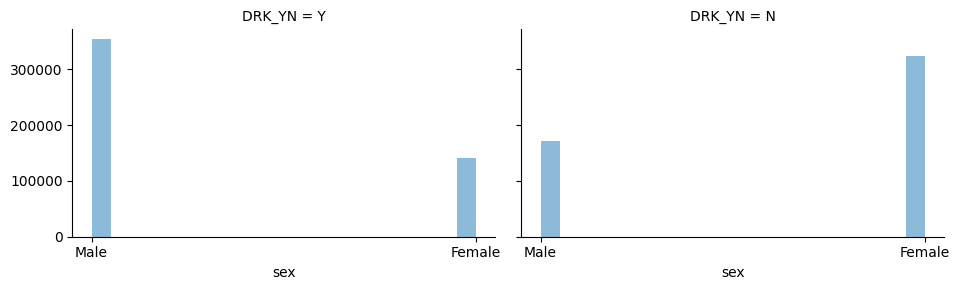

In [118]:

grid = sns.FacetGrid(dt, col='DRK_YN', aspect=1.6)
grid.map(plt.hist, 'sex', alpha=.5, bins=20)
grid.add_legend()

#em vez de one-hot-encoded vamos passar 1 para homem e 0 para mulher sabendo que os homens sao mais propicios a beber...como mostrado no dataset
dt2 = dt.copy()
display(Counter(dt2.sex))
dt2['sex'] = dt2['sex'].map({
    'Male': 1,
    'Female' : 0
})

dt2['DRK_YN'] = dt2['DRK_YN'].map({
    'Y':1,
    'N':0
})#so para conseguir ver a correlacao

dt2.head(4)

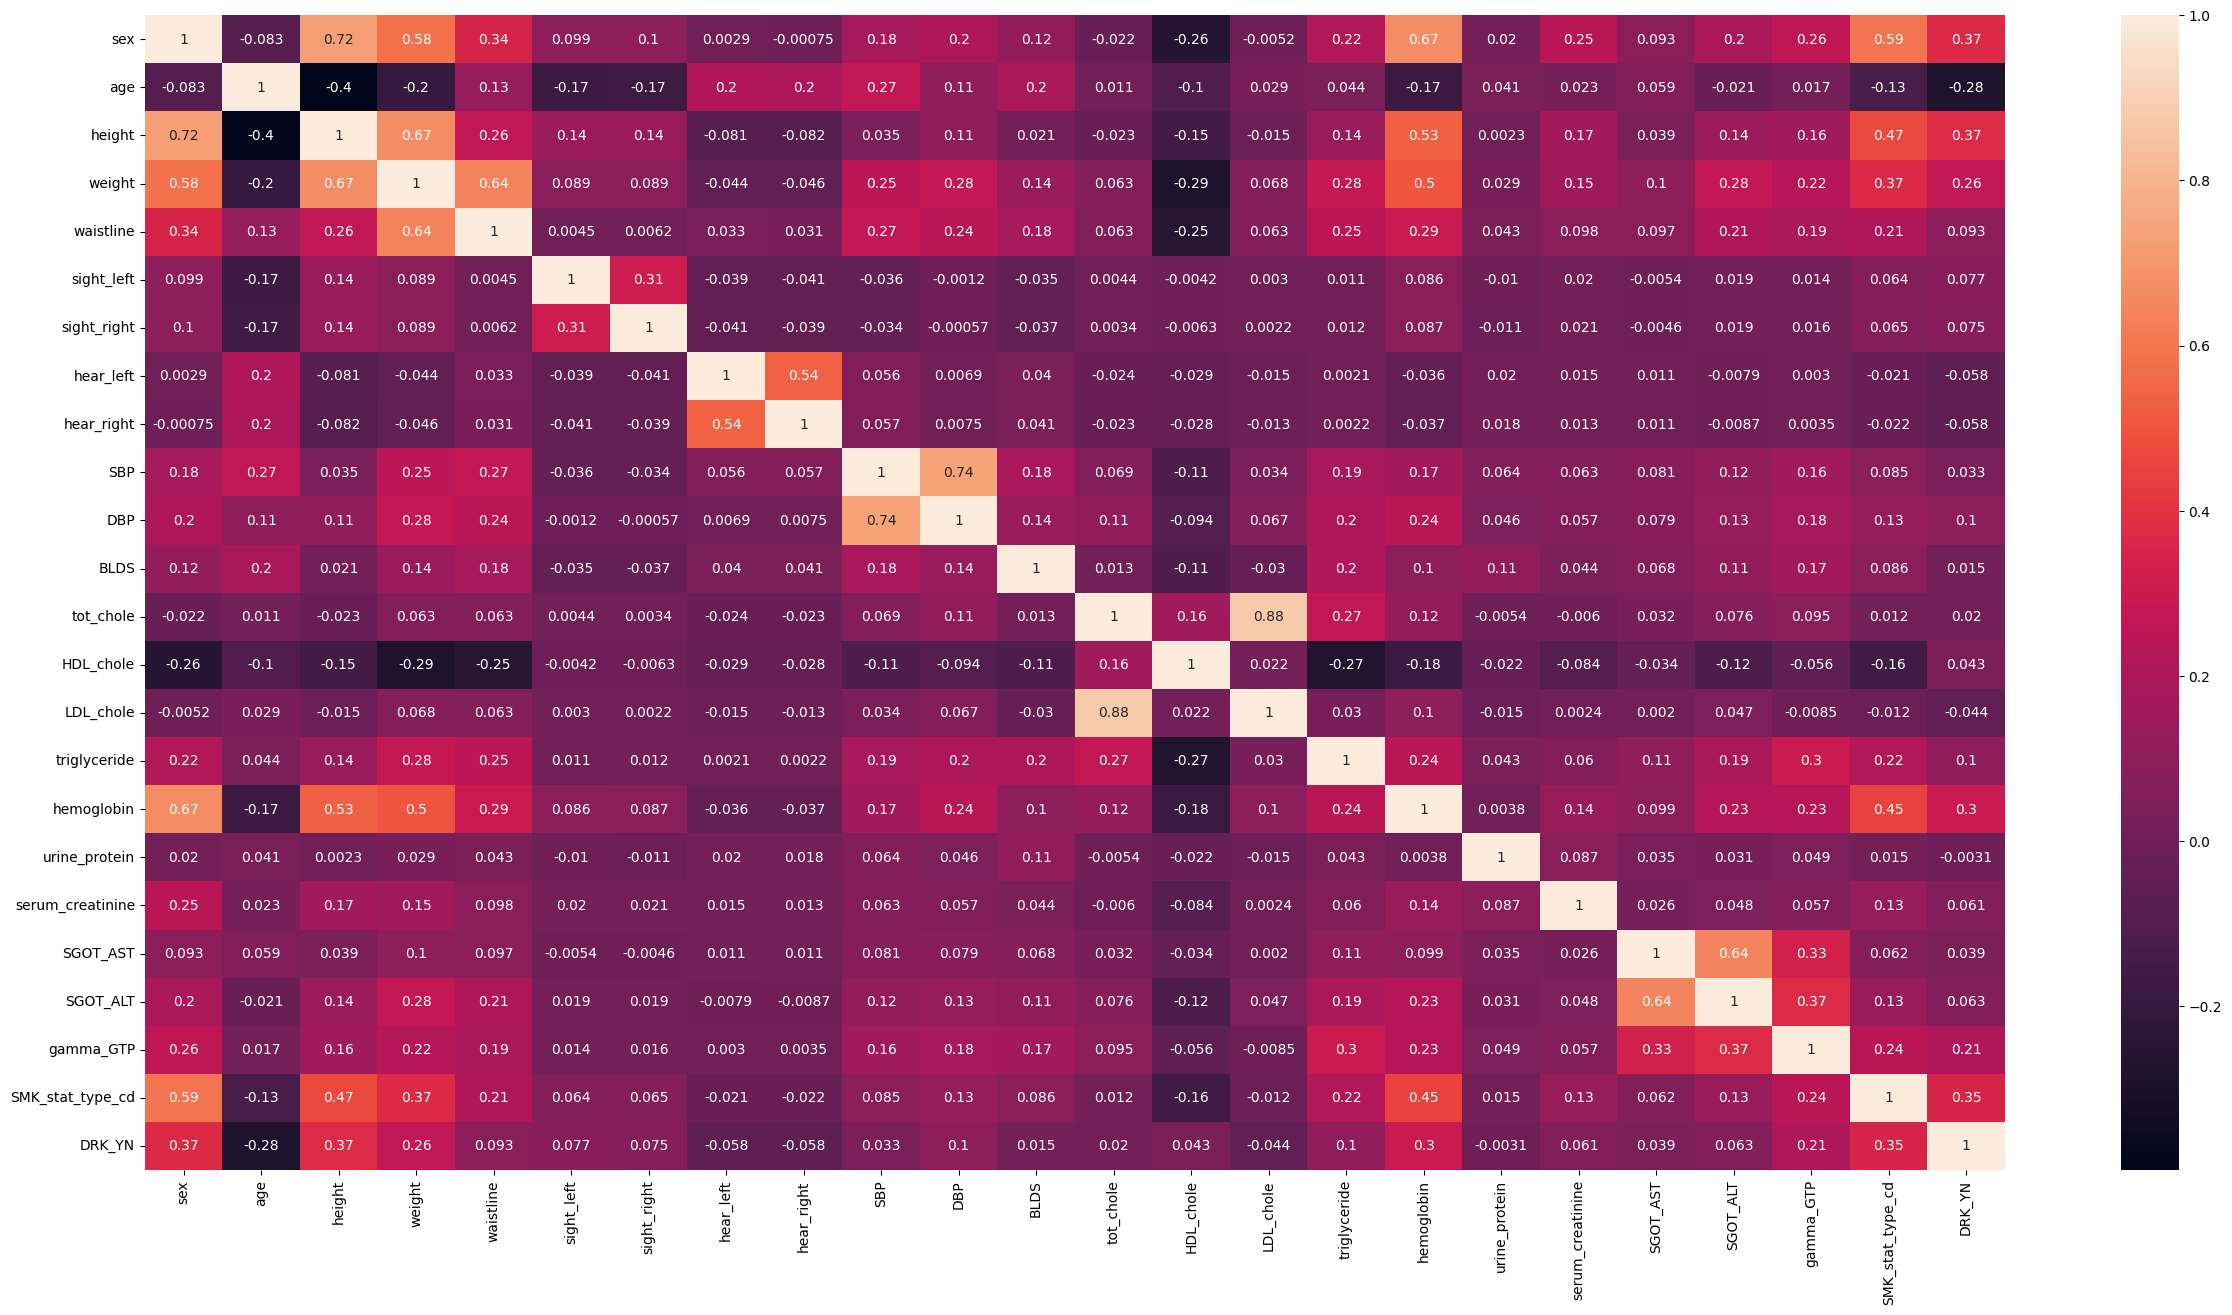

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


sex                 0.368726
age                -0.284587
height              0.374566
weight              0.264282
hemoglobin          0.299341
gamma_GTP           0.205094
SMK_stat_type_cd    0.350784
DRK_YN              1.000000
Name: DRK_YN, dtype: float64
['sex', 'age', 'height', 'weight', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']


In [120]:
plt.figure(figsize=(30, 15))  # Ajuste os valores conforme necessário
sns.heatmap(dt2.corr(), annot=True,
        xticklabels=dt2.columns,
        yticklabels=dt2.columns,)

plt.show()
display(dt2.head(5))
corr = dt2.corr()
targetColumnCorr = corr.DRK_YN
goodColumns = targetColumnCorr[(targetColumnCorr >= 0.2) | (targetColumnCorr <= -0.2)]
print(goodColumns)
columns = goodColumns.index.tolist()
print(columns)
##### filtro as colunas que tem uma boa correlacao


dt3 = dt2.copy().get(columns)

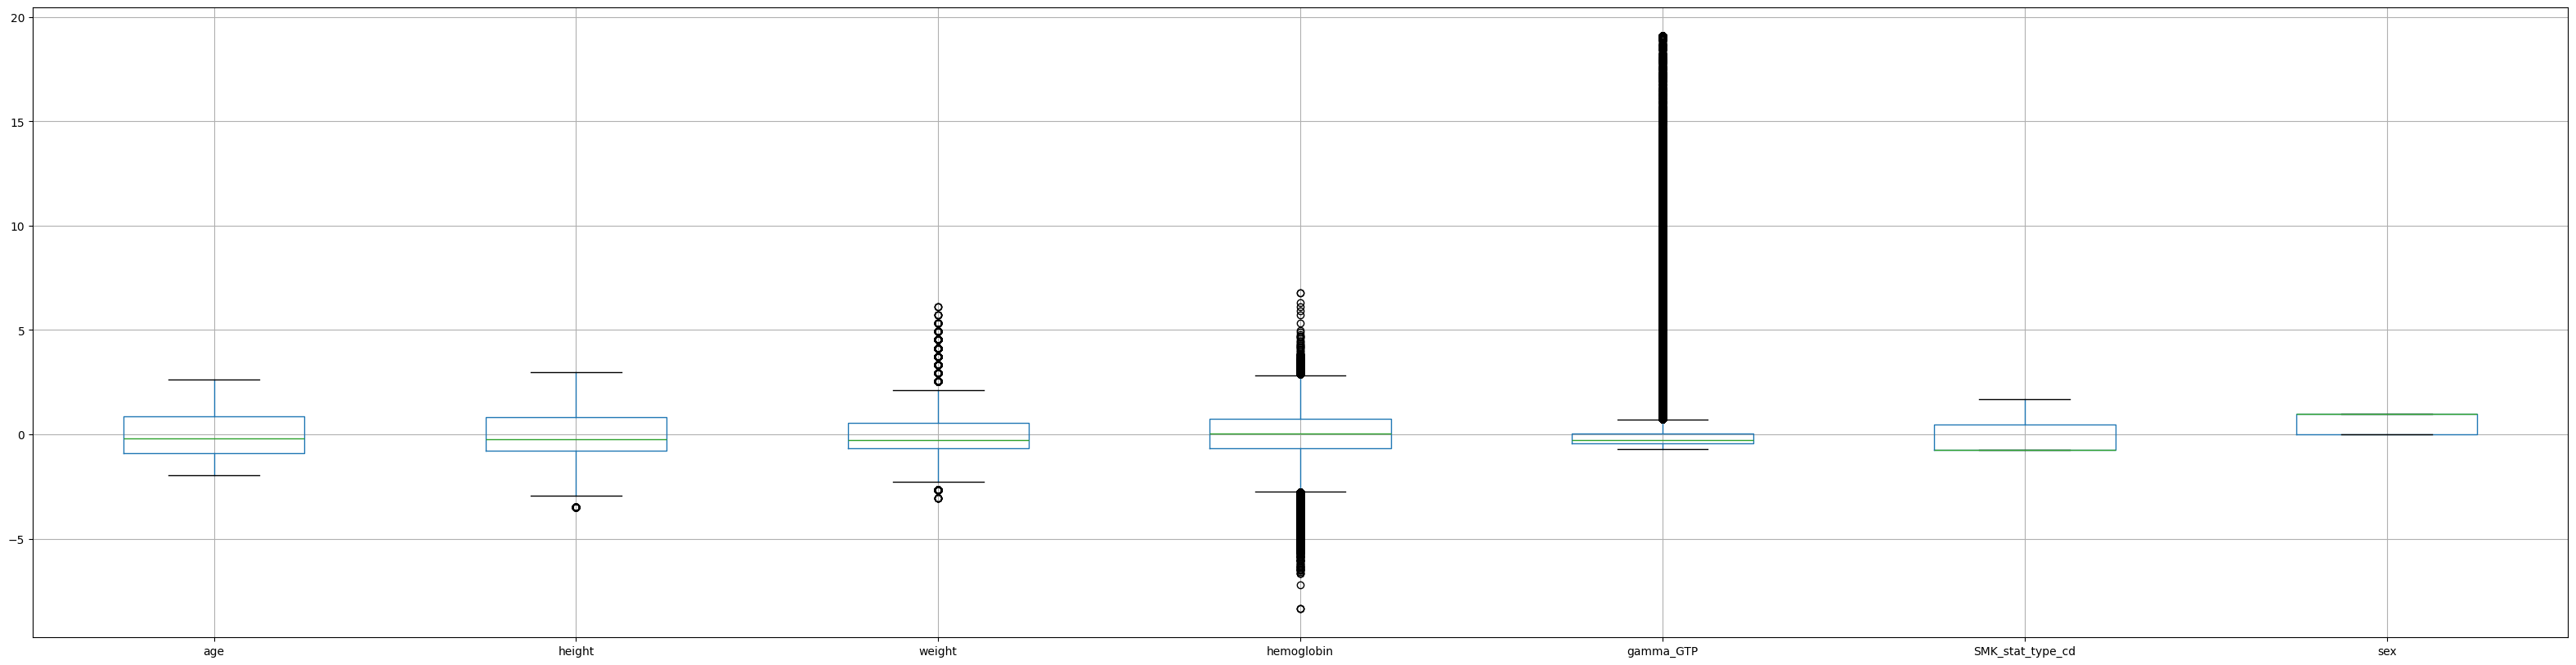

        age    height    weight  hemoglobin  gamma_GTP  SMK_stat_type_cd  sex
0 -0.889514  0.835874  0.936210    1.810919   0.056791         -0.742965    1
1 -1.242090  1.913117  1.335755    0.990693  -0.201022          1.700509    1
2 -0.536938  0.297252  0.936210    0.990693   0.612081         -0.742965    1


In [110]:
dt3X = dt3.copy().drop(columns=['DRK_YN'])
dt3Y = dt3['DRK_YN']

# Armazenar a coluna 'sex' em separado
sex_column = dt3X['sex']

# Excluir a coluna 'sex' antes da normalização
dt3X_no_sex = dt3X.drop(columns=['sex'])

# Aplicar o StandardScaler nas demais colunas
scaler = StandardScaler()
dt3X_scaled = pd.DataFrame(scaler.fit_transform(dt3X_no_sex), columns=dt3X_no_sex.columns)

# Concatenar a coluna 'sex' de volta ao DataFrame normalizado
dt3X_final = pd.concat([dt3X_scaled, sex_column.reset_index(drop=True)], axis=1)

# Visualizar o boxplot após a normalização (exceto 'sex')
dt3X_final.boxplot(figsize=(40,10))
plt.show()

print(dt3X_final.head(3))

,age,height,weight,hemoglobin,gamma_GTP,SMK_stat_type_cd,sex,DRK_YN
0,-0.889514,0.835874,0.936210,1.810919,0.056791,-0.742965,1,1
1,-1.242090,1.913117,1.335755,0.990693,-0.201022,1.700509,1,0
2,-0.536938,0.297252,0.936210,0.990693,0.612081,-0.742965,1,0
3,0.168215,1.374495,1.335755,2.126391,-0.379508,-0.742965,1,0


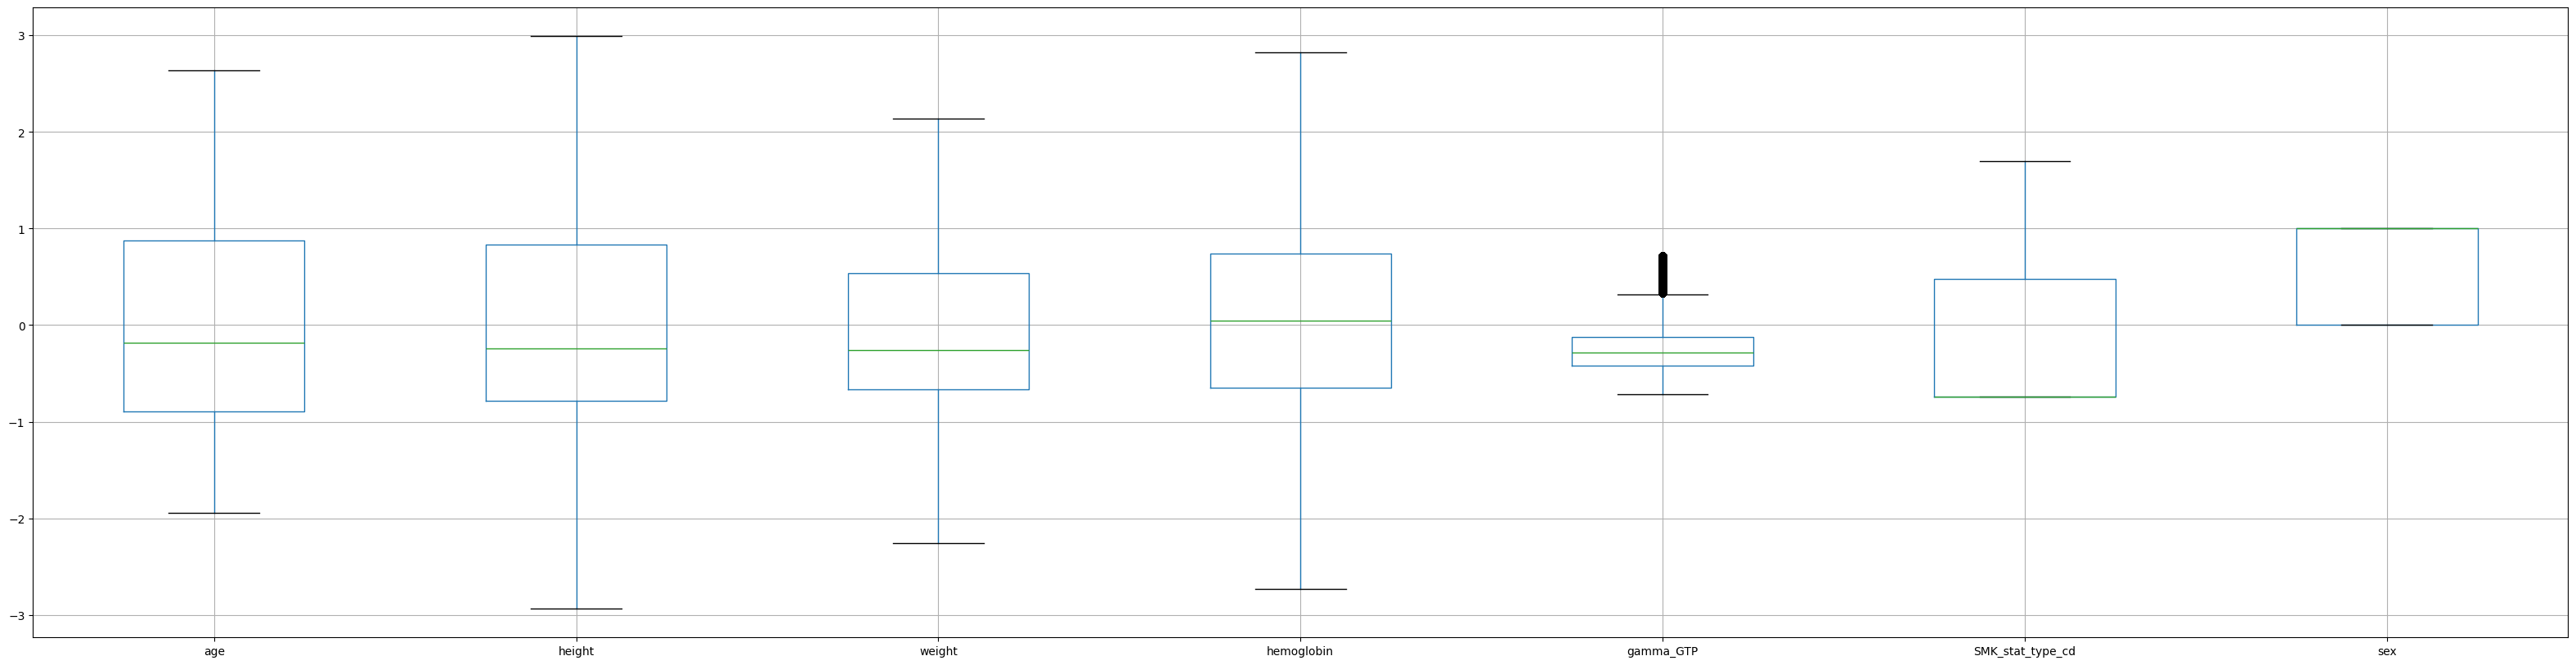

In [112]:
#tratativa do outlier
targetColumns = ['weight', 'hemoglobin', 'gamma_GTP', 'height']
for col in targetColumns:
    Q1 = dt3X_final[col].quantile(0.25)
    Q3 = dt3X_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dt3X_final[col] = np.where(dt3X_final[col] < lower_bound, dt3X_final[col].median(), dt3X_final[col])
    dt3X_final[col] = np.where(dt3X_final[col] > upper_bound, dt3X_final[col].median(), dt3X_final[col])

dt3X_final.boxplot(figsize=(40,10))
# dt3X = dt3X.drop(columns=['gamma_GTP'])#muito outlier para pouca correlacao
dt4 = pd.concat([dt3X_final, dt3Y], axis=1)
display(dt4.head(4))


In [113]:
#talvez aqui seja um boa hora para traçar a correlação
print('dataset antes', len(dt4))
print('dataset dps')
duplicated = dt4.duplicated()
print('linhas duplicadas', len(duplicated[duplicated==True]))
dtf = dt4.drop_duplicates()
print('novo tamanho do datase',len(dtf))
print('diferenca entre classes Y', Counter(dtf['DRK_YN']))
#diferença pequena entre classes nao sera necessario balancear
dtf.head(5)

dataset antes 991346
dataset dps
linhas duplicadas 267071
novo tamanho do datase 724275
diferenca entre classes Y Counter({1: 376755, 0: 347520})


,age,height,weight,hemoglobin,gamma_GTP,SMK_stat_type_cd,sex,DRK_YN
0,-0.889514,0.835874,0.936210,1.810919,0.056791,-0.742965,1,1
1,-1.242090,1.913117,1.335755,0.990693,-0.201022,1.700509,1,0
2,-0.536938,0.297252,0.936210,0.990693,0.612081,-0.742965,1,0
3,0.168215,1.374495,1.335755,2.126391,-0.379508,-0.742965,1,0
4,0.168215,0.297252,-0.262425,-0.271194,-0.240685,-0.742965,1,0


In [119]:
dfy = dtf['DRK_YN']
dfx = dtf.drop(columns=['DRK_YN', 'gamma_GTP'])

display(dfx.head(5))

X_train, X_test, y_train, y_test = shuffle(dfx, dfy)

knnFit(X_train, y_train, X_test, y_test)
bernoullin(X_train, y_train, X_test, y_test)
gaussian(X_train, y_train, X_test, y_test)


,age,height,weight,hemoglobin,SMK_stat_type_cd,sex
0,-0.889514,0.835874,0.936210,1.810919,-0.742965,1
1,-1.242090,1.913117,1.335755,0.990693,1.700509,1
2,-0.536938,0.297252,0.936210,0.990693,-0.742965,1
3,0.168215,1.374495,1.335755,2.126391,-0.742965,1
4,0.168215,0.297252,-0.262425,-0.271194,-0.742965,1


0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

Acurácia KNN: 66.57643372062374 %
Acurácia Bernoulli: 65.43255331344582 %
Acurácia gaussian: 65.98441075933744 %


GaussianNB()

In [101]:
# insercaoSequencial(X_train, y_train, X_test, y_test)

In [102]:
# eliminacaoSequencial(X_train, y_train, X_test, y_test)
